In [3]:
import pandas as pd
np = pd.np
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 500)

from IPython.display import display, HTML
import seaborn as sns
from seaborn.utils import plt

# display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML(open("../shared-resources/jupyter.css", "r").read()))
%matplotlib inline
# import mpld3

sns.mpl.rc("figure", figsize=(16, 6))
# plt.style.use('seaborn')
# plt.rc("figure", figsize=(16, 6))
# mpld3.enable_notebook()


from nlpia.data.loaders import get_data

In [4]:
df = get_data('ubuntu_dialog')
df.head()

requesting URL: https://www.dropbox.com/s/krvi79fbsryytc2/ubuntu_dialog.csv.gz?dl=1
remote size: 296098788
local size: 296098788


,Context,Utterance
0,i think we could import the old comments via r...,basically each xfree86 upload will NOT force u...
1,I'm not suggesting all - only the ones you mod...,oh? oops. __eou__
...,...,...
3,interesting __eou__ grub-install worked with /...,i fully endorse this suggestion </quimby> __eo...
4,and because Python gives Mark a woody __eou__ ...,(i thought someone was going to make a joke ab...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499744 entries, 0 to 1999998
Data columns (total 2 columns):
Context      1499744 non-null object
Utterance    1499744 non-null object
dtypes: object(2)
memory usage: 34.3+ MB


In [6]:
len(df)

1499744

In [7]:
h = pd.DataFrame(index=df.index)
h['context_len'], h['utterance_len'] = df.Context.str.len(), df.Utterance.str.len()
print(h.min().min(), h.max().max())
h.describe().T

8 10835


,count,mean,std,min,25%,50%,75%,max
context_len,1499744.0,489.090587,404.449046,36.0,218.0,362.0,619.0,10835.0
utterance_len,1499744.0,85.485046,79.375129,8.0,34.0,64.0,111.0,3154.0


[  8.00000000e+00   2.78675000e+02   5.49350000e+02   8.20025000e+02
   1.09070000e+03   1.36137500e+03   1.63205000e+03   1.90272500e+03
   2.17340000e+03   2.44407500e+03   2.71475000e+03   2.98542500e+03
   3.25610000e+03   3.52677500e+03   3.79745000e+03   4.06812500e+03
   4.33880000e+03   4.60947500e+03   4.88015000e+03   5.15082500e+03
   5.42150000e+03   5.69217500e+03   5.96285000e+03   6.23352500e+03
   6.50420000e+03   6.77487500e+03   7.04555000e+03   7.31622500e+03
   7.58690000e+03   7.85757500e+03   8.12825000e+03   8.39892500e+03
   8.66960000e+03   8.94027500e+03   9.21095000e+03   9.48162500e+03
   9.75230000e+03   1.00229750e+04   1.02936500e+04   1.05643250e+04
   1.08350000e+04]


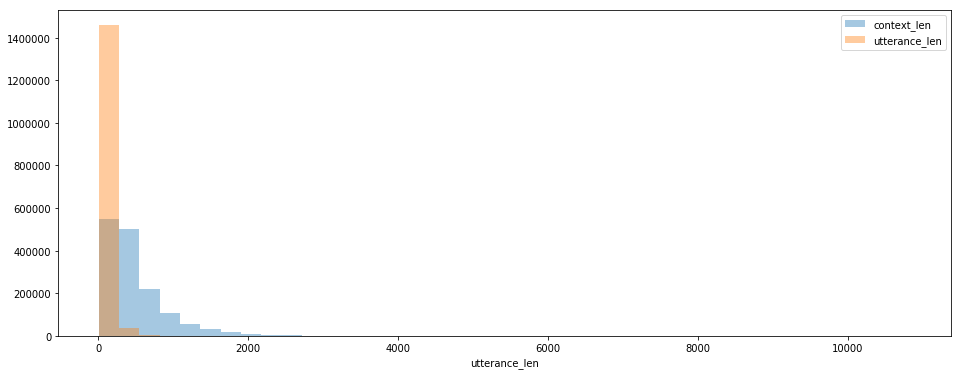

In [7]:
bins = np.arange(41) * (h.max().max() - h.min().min()) / 40. + h.min().min()
print(bins)

fig = plt.figure()
ax = fig.subplots()
for c in h.columns:
    ax = sns.distplot(h[c], bins=bins, ax=ax, kde=False)
plt.legend(h.columns)
plt.yscale = 'log'


In [8]:
from gensim.corpora import Dictionary, TextCorpus, MmCorpus
from gensim.models import LsiModel, TfidfModel
from nltk.tokenize.casual import TweetTokenizer
# from tqdm import tqdm

In [14]:
import re
from itertools import chain

splitter = re.compile(r'__eo[a-z]__') 
for sent in chain.from_iterable(splitter.split(df.Context.iloc[i]) for i in range(3)):
    if len(sent.strip()):
        print(sent)

i think we could import the old comments via rsync, but from there we need to go via email. I think it is easier than caching the status on each bug and than import bits here and there 
 it would be very easy to keep a hash db of message-ids  
 sounds good 
 ok 
 perhaps we can ship an ad-hoc apt_prefereces 
 version? 
 thanks 
 not yet 
 it is covered by your insurance? 
 yes 
 but it's really not the right time :/ 
 with a changing house upcoming in 3 weeks 
 you will be moving into your house soon? 
 posted a message recently which explains what to do if the autoconfiguration does not do what you expect 
 how urgent is #896? 
 not particularly urgent, but a policy violation 
 i agree that we should kill the -novtswitch 
 ok 
 would you consider a package split a feature? 
 context? 
 splitting xfonts* out of xfree86*. one upload for the rest of the life and that's it 
 splitting the source package you mean? 
 yes. same binary packages. 
 I would prefer to avoid it at this stage.  th

In [28]:
import re
from itertools import chain 

def split_eou(iterable, splitter=re.compile('__eo[a-z]__')):
    for utterance in chain.from_iterable(splitter.split(uts) for uts in iterable):
        if len(utterance.strip()):
            yield utterance

for ut in chain.from_iterable([split_eou(df.Context), split_eou(df.Utterance)]) :
    print(ut)
    break

texts = chain.from_iterable([split_eou(df.Context), split_eou(df.Utterance)])
# assert len(texts) == 2 * len(df)
# assert df.Context.str.contains('\n').sum() == 0
# assert df.Utterance.str.contains('\n').sum() == 0

TEXT_PATH = '../shared-resources/ubuntu_dialog.txt'  # file that will contain one document per line (), all statements, then all utterances

i think we could import the old comments via rsync, but from there we need to go via email. I think it is easier than caching the status on each bug and than import bits here and there 


In [24]:
with open(TEXT_PATH, 'w') as fout:
    for i, text in enumerate(texts):
        fout.write(text + '\n')
print('Wrote {} lines to {}'.format(i + 1, TEXT_PATH))
del texts
del h

Wrote 12290390 lines to ../shared-resources/ubuntu_utterances.txt


In [16]:
class BOWCorpus(object):

    def __init__(self, file_path, vocab=None, dictionary=None, tokenizer=TweetTokenizer(preserve_case=True), batch_size=10000):
        self.file_path = file_path
        self.batch_size = batch_size
        self.vocab = vocab if vocab is not None else (dictionary if dictionary is not None else None)
        self.tokenizer = tokenizer if tokenizer is not None else TweetTokenizer(preserve_case=True)
        self.num_documents = 0

        if self.vocab is None:
            self.vocab = Dictionary()
            with open(self.file_path) as fin:
                batch = []
                for i, line in enumerate(fin):
                    if not ((i + 1) % self.batch_size):
                        self.vocab.add_documents(batch)
                        batch = []
                        print(i, line[:60])
                    batch = batch.append(line)
                    self.num_documents = i + 1
                if len(batch):
                    self.vocab.add_documents(batch)
                    batch = []
                    

    def __iter__(self):
        with open(self.file_path) as fin:
            for i, line in enumerate(fin):
                if not i % self.batch_size:
                    print(i, line[:60] + '...')
                # assume there's one document per line, tokens separated by whitespace
                yield self.vocab.doc2bow(self.tokenizer.tokenize(line))

In [17]:
bows = BOWCorpus(TEXT_PATH)

0 i think we could import the old comments via rsync, but from
1000 hi there __eou__ anybody experienced trouble with sound  __e
2000 it could also be some element of the OBEX protocol niceties 
3000 hey all...anybody know how to install some win codecs? __eou
4000 Whats the difference between universe and multiverse ? __eou
5000 does the default kernel have no loop iso mount support? __eo
6000 hello __eou__ so, if you install a package in ubuntu does it
7000 so why not use a 4 page disertation for the version "number"
8000 there is no good download manager? __eou__ __eot__ for what?
9000 hrmph -- so, I'm well along with my debian-to-ubuntu convers
10000 how fissy? __eou__ ehhh that was supposed to go to baluba __
11000 anyone? kernel source on ubuntu? __eou__ anyone? is there ke
12000 hrm __eou__ Why not optimise for i586/i686? __eou__ __eot__ 
13000 apt-get is getting really old stuff in my just installed ubu
14000 Anybody else here playing Quake 3? __eou__ __eot__ I played 
15000 oo

123000 would an athlon 64 3800+ dual core use a 686-smp kernel or a
124000 ok, now i have amarok 1.3.8   It does 'detect' my ipod, tech
125000 I wondering if I should dist-upgrade to hoary. Any comments?
126000  Encoding as 16 kHz  32 kbps single-ch MPEG-2 Layer III (8x)
127000 sound blaster 16 pnp __eou__ can ya explain that in laymans 
128000 can anyone recommend pmud over pbbuttons? __eou__ __eot__ Su
129000 prolly means the dev is not ther __eou__ prolly means the de
130000 don't thank me yet __eou__ nfi if it works ! :o __eou__ prob
131000 can someone help me with the chmod command? __eou__ __eot__ 
132000 and it couldnt find it __eou__ I did, i typed in 'sudo wine 
133000 how do i make amarok play mp3 files? i'm using gstreamer eng
134000 you guys, how do i check if the xdamage extension is loaded 
135000 Anyone know how I can use .rpm files with ubuntu?  I just in
136000 ^-^ __eou__ raight, out of the box :) __eou__ blackbox, flux
137000 i have a microsoft intellimouse under ubu

244000 I need a good app for writing algebraic formulae out. Any su
245000 hey bman __eou__ its fox __eou__ lol __eou__ how can i find 
246000 I have just done it willi1 __eou__ But now it is not allowin
247000 where could i get some themes for xmms __eou__ __eot__ http:
248000 oye __eou__ apt-cache search pam | less __eou__ __eot__ very
249000 hmm, Linksys' stuff has really seemed to have degraded ever 
250000 I just upgraded my kernel to  2.6.17-11-generic and my wirel
251000 used easyubuntu to install sun-java and other stuff, acciden
252000 hey all. can someone tell me how to prevent my slave hard di
253000 Hello, world. __eou__ OK, bash/linux/sudo experts, find the 
254000 !za __eou__ comeon... what's the terminal command to see the
255000 conrad_: you still here? __eou__ keller: you still here? __e
256000 can someone please help me setting up MultiGet download mana
257000 Hey guys, are there any 64 bit drivers out there for broadco
258000 if i set up a fat32 partition, can linux 

365000 KILL DASH NINE __eou__ __eot__ are you singing the song? __e
366000 hi. i'm trying to emulate N64 games with mupen64 and kamefu 
367000 can anybody help me in changing the desktop icon text color 
368000 Chill firefox and thats abou tit __eou__ __eot__ null needs 
369000 i just copied over a directory from a seperate partition to 
370000 seriously, can anyone aid me in getting airport-config worki
371000 hi everyone, __eou__ anybody with freezing issue on Gutsy ? 
372000 how do I give a bridge interface a gateway address? __eou__ 
373000 i can't load my xserver __eou__ and i have one important fil
374000 help, how come after uninstalling wine .. and removing the .
375000 is there a way to kill X only without affecting all the serv
376000 Hello everyone. I recently installed ubuntu-desktop over a k
377000 archive.canonical.com/"dist name" __eou__ __eot__ much appri
378000 does ubuntu have a link that explains the size of partitions
379000 are there any admins for this place? __eo

486000 echo $(( ($(date -d 'Mar  1 2009' +%s) - $(date +%s))/60/60/
487000 man adduser says useradd might be friendlier __eou__ __eot__
488000 pici: no email in my box __eou__ why does #python require us
489000 can I back up my laptop's entire drive?  I'm talking multi-p
490000 hello all __eou__ where can I find new vlc for ubuntu ? __eo
491000 I am sorry, I still don't understand this RESOURCES_64BIT op
492000 how can I login with root account? Do I have to activate it?
493000 anybody : how much of memory should i have on hdd to have ub
494000 can someone help me to get a python-script start with xdm? i
495000 any photographers here? __eou__ any photographers here? __eo
496000 can someone help me on remounting my secondary hard drive?  
497000 anybody know how to fix CRC Error? __eou__ __eot__ in what c
498000 hey friends!what does make modules_install do after make the
499000 is anyone able to watch videos on nbc.com? __eou__ __eot__ t
500000 When editing the permissions of a directo

607000 how do i create usb bootable drive from server (i386) iso? _
608000 anyone can help me with >>> this problem rndc: connect faile
609000 So which should I install, 32-bit or 64-bit? I've got a quad
610000 I thought the wine website had links to all old versions __e
611000 Can I remote start a laptop running ubuntu? __eou__ __eot__ 
612000 neone have aspire one with them __eou__ aspire one __eou__ _
613000 how do i get usb working in virtualbox? in ubuntu 9.04 __eou
614000 If any one can help me that would be rad, I'm even will to t
615000 any opinion ,thanks but it's urgent __eou__ __eot__ i don't 
616000 nice call ejv __eou__ __eot__ heheh, you in the market? :p _
617000 anyone aware of a 2.6.x live usb that is less than 60MB? __e
618000 I found this forum posting, http://ubuntuforums.org/archive/
619000 a lot of people use glade.. you might want some other packag
620000 can anyone help me with compiling programs that use qt? it l
621000 is there anyway to save the video in http

728000 how do you change where the window manager buttons are? For 
729000 anyone know how i can join an  image + mp3 for youtube. i in
730000 Hi Ubuntu pros. I'm teaching some talented youngsters basics
731000 hey my web home page has just been changed to start.ububtu  
732000 How can i found the hostname of specific IP? is any command?
733000 I want to make another user that is not an administrator abl
734000 none? __eou__ __eot__ none what??? __eou__ __eot__ kernels i
735000 what hardware do the developers recommend?  is there a list 
736000 i want an image viewer sub console __eou__ can any one help 
737000 Is there a way to change username in ubuntu 9.20 __eou__ 9.1
738000 narf!@ __eou__ ja, im also troubleshooting display driver is
739000 Can anybody help me remove compiz completely from terminal, 
740000 How do I remove an Fstab entry if ubuntu won't boot? __eou__
741000 Assuming a lot of users are using xchat... question: what do
742000 can somebody help me __eou__ How do they 

849000 how can I change the time format on the login screen to be 2
850000 th0r/Phoenix87: I suppose it's just the package removal righ
851000 hi are the security updates really required. it asks me to d
852000 ok guys when i'm tryin to wget and the url has spaces in it.
853000 a terminal program wants me to enter some stuff from the key
854000 here is some dmesg output that shows the device being recogn
855000 Tried to find the source code online with google but there d
856000 Hi! I'm using Ubuntu 11.10 and printer HP 1020. When I plug 
857000 anyone tried kubuntu? __eou__ i'm trying to decide if i want
858000 Er, what?  ctrl+alt+delete would just reboot.  You mean back
859000 Hi everyone, I recently have written a few program and I pla
860000 this is just a general question, but does anyone have a reco
861000 hi. Is there a way to tell apt-get/aptitude to upgrade from 
862000 your locale is also messed up. you should try and fix that w
863000 hello everyone __eou__ I'm trying to ssh 

970000 hello all __eou__ i just installed ubuntu... and it never as
971000 are there any graphics promreams for gnome good for a quick 
972000 how do I run programs that I'm not able to run by just enter
973000 hi! could someone tell me how to get started with postfix? I
974000 Hello. __eou__ I am new to linux. Can any one help with a to
975000 yes nero __eou__ I burned it with Nero __eou__ a data disk _
976000 witch program lloks like winamp , or does what winamp used t
977000 the root pass isn't lock __eou__ __eot__ ? __eou__ __eot__ 

978000 I think "dpkg --list" gives all installed packages, and ther
979000 anybody tried the new ati drivers? 8.23.7? much improvement 
980000 ok this is frustrating. __eou__ trying to find a good media 
981000 hahaha nice. Photoshop 7 CAN be installed using wine. __eou_
982000 just sitting here doing nothing.. slowly watching Firefox ea
983000 !What do i type in terminal to move files from one computer 
984000 i am installing a Perl web application ca

1090000 why shouldnt I use -j3 when compileing a kernel with debian/
1091000 how i make a hard drive totally blank __eou__ __eot__ apt-ca
1092000 "nu tu ubuntu" = i'm a n00b with Ubuntu __eou__ :)     I'm n
1093000 Hi I'm having problems compiling fwbuilder-2.1.14 . Getting 
1094000 Is there a way to only have 1 instance of VLC like in window
1095000 how to restart that nautilus?? __eou__ __eot__ you mostliky 
1096000 !hardware __eou__ best look there RAdams __eou__ __eot__ tha
1097000 Hi __eou__ Hmmmm I need hel please __eou__ I install ubuntu 
1098000 o man this is annoying :| __eou__ i hav ea widescreen tv and
1099000 for some reason I keep getting an error window popping up th
1100000 hello, mrxvt doesn't have any accents, how to add them pleas
1101000 hmm, i actually can't seem to find much info on update manag
1102000 this may be a really stupid question but does anybody know i
1103000 Hi, I've just upgraded to Gutsy, and when I load up gnome th
1104000 is there a log I can watch

1209000 Does anyone know how to get Broadcom B43 working? It was wor
1210000 there is a root account.. if you sudo su - you will be root.
1211000 audio CDs don't mount __eou__ __eot__ Well, that might expla
1212000 every Internet connected OS needs an enabled firewall simple
1213000 how long does kernel compilation usually take? __eou__ __eot
1214000 where does aptitude download the .deb packages to? __eou__ _
1215000 hi, another problem, I have a php file in /var/www that writ
1216000 Have you tried running an fsck / re-installing firefox / dow
1217000 how do I rescue a broken usb flash drive that is recognized 
1218000 hi, i had a litle problems when installing the virtualbox an
1219000 my firefox seams very slow to open up windows, can I reinsta
1220000 I have 8.10 - Should I downgrade? __eou__ __eot__ what probl
1221000 any good DVD burning programs out there? A friend of mine us
1222000 My sound suddenly stopped working. I can't hear anything. I 
1223000 could you please recommend

1328000 it didn't include foul language etc. __eou__ __eot__ sudo ap
1329000 how can i stream my line in input on my wlan? __eou__ __eot_
1330000 does anyone know if it's possible to subscribe and download 
1331000 hey, can i have a host ? __eou__ __eot__ what do you mean __
1332000 n00b question but if I clone my ubuntu drive and burn onto a
1333000 what app would be recommended to backup a whole hard drive? 
1334000 someone does know about internet connection issue with ubunt
1335000 friends, plz help  me. i'm having a problem with booting ubu
1336000 Need help with my usb flash cannot drag and drop files to it
1337000 does anyone know much about network devices? I'm having some
1338000 Hello, I'm trying to get wbar to work, but typing wbar on th
1339000 anyone using 10.10? how to customize sound ? there is no opt
1340000 I have a file which contains all my passwords and usernames.
1341000 or hibernate __eou__ __eot__ my pc hibernates just fine.. as
1342000 i can salute if you like..

1447000 anyone know how to rename USB thumbdrives? __eou__ QUESTION:
1448000 well so everything went pretty well except I lost two functi
1449000 an error moshisushi __eou__ __eot__ what? __eou__ what error
1450000 if I type in ifconfig > ifstatus.txt does this spit the resu
1451000 I have a USB datacable and i've configured my Win XP machine
1452000 yea, - would input data from stdin or something, but general
1453000 hello all.  I am having an issue with the calendar associate
1454000 No candidate version found for j2re1.4 __eou__ The following
1455000 how can I get my usb mp3 player to automount again? it worke
1456000 Whats the best HTML Editor for Ubuntu ?? __eou__ __eot__ blu
1457000 i am trying 2 run gnome in kubuntu __eou__ i have just insta
1458000 hi friends.. how are you __eou__ hey can anyone tell me if i
1459000 how do I reinstall grub after windows install? __eou__ I don
1460000 Though I am spoiled by gnome __eou__ minum requirements for 
1461000 I just downloaded Ubuntu 5

1580000 gftp first then fireftp __eou__

1581000 there is several posts in the ubuntu forums (look in the tip
1582000 cant convince my woman to switch from windows :( __eou__

1583000 not in here please __eou__

1584000 i suppose so __eou__

1585000 nope __eou__

1586000 try disabling sound support in gnome (i.e. ESD) and then try
1587000  Eh, no, not on the machine I'm messing with currently, thou
1588000 those are bitmap pcf fonts, i believe __eou__ the artwiz __e
1589000 synaptic is front end for apt-get/aptitude ... __eou__ can y
1590000 we're all new to something __eou__ help.ubuntu.com __eou__

1591000 i think e17"enlightenment" gonna be the unique desktop syste
1592000 Tad - it even supports my old tuner too. just about everythi
1593000 its ok.now i see the Debian menu:) __eou__

1594000 then do apt-get update and apt-get dist-upgrade __eou__ I di
1595000 i think i helped juantao with the gpg problem... __eou__

1596000 sure most of the dependencies can be resolved using the inf

1723000 hmm __eou__ i'll check it out tomorrow __eou__

1724000 ah, didn't know about the wiki. __eou__

1725000 apecat, __eou__ Thanks! Been meaning to nail this down for a
1726000 i wouldn't do what he's done either __eou__

1727000 plenty of highly paid programmers. __eou__

1728000 Just incase u forget __eou__

1729000 I doubt that __eou__

1730000 "Could not init font path element /var/blahblahvblah/TrueTyp
1731000 xfcemediaplayer just loads themm. __eou__

1732000 my spelling is a bit off __eou__

1733000 lol __eou__

1734000 ohh ok, i thought that was a gnome login screen. __eou__  th
1735000 yeah, but E17 and enlightenment are 2 different beasts __eou
1736000 -- thanks, I knew I had seen that functionality *somewhere*!
1737000 :) __eou__

1738000 cat won't let you browse the file, so it's not convenient fo
1739000 kitche: like this:  http://pastebin.ca/315975 __eou__

1740000 use: sudo aticonfig --initial __eou__ then restart your comp
1741000 ok, then the theme installer shoul

1876000 could <interface> be wlan0 ? __eou__

1877000 so, if I have an okay nvidia card that is giving me trouble,
1878000 do you enter a latter it can complete? __eou__

1879000 thanks, :) turned out it was just one file __eou__

1880000 primary difference is that ext3 has a journal __eou__ and so
1881000 for example...if an package is installed...you could  use th
1882000 sorry about the long message. __eou__

1883000 much appreciated __eou__

1884000 thanks, ill look it up __eou__

1885000 OK, I've got to go through a few reboots so I'll be dropping
1886000 but when i run ifconfig wlan0 up it brings up the wireless c
1887000 Athlon XP is 686, with MMX.. and some other stuff __eou__ th
1888000 I'm working with a family member who has two notebooks. On 7
1889000 well i dont know ... in any case... i need to do   pon nameo
1890000 do you know what others :) __eou__

1891000 ahh if noone has an answer here id suggest asking in #compiz
1892000 in theory you're right, but in practice ther

2026000 i did a fresh ubuntu 8.10 install, no upgrading __eou__

2027000 ls -l RegnumOnlineInstall_32 __eou__

2028000 Have you tried googling first? __eou__

2029000 Umm CLI? __eou__

2030000 yep __eou__ Ok m8. __eou__

2031000 you dont give permissions to apps, only to users __eou__

2032000 i know the ip of the server as it is static __eou__

2033000 so far I only have one page that is close enough to what I'm
2034000 thanks __eou__ Hmm, how do I figure out which one is eth1, e
2035000 np man __eou__

2036000 the article in wikipedia on java is quite good __eou__

2037000 I don't know. __eou__

2038000 Setting up the rsyncd.conf file __eou__ And the various othe
2039000 -> cd __eou__ -> are you sure it is desktop not Desktop?  ca
2040000 you can only reinstall __eou__

2041000 huh? __eou__

2042000 oh... you mean i can use dpkg with that ? __eou__

2043000 ive gotta learn some day! __eou__

2044000 If you can find the iso, you should be able to mount it. __e
2045000 thank you. __eou

2174000 but i want to manage vhosts as well __eou__ i want a thing l
2175000 they are giving different info from what i got when i was gi
2176000 the syntax for sending a factoid to a user is "!factoid | us
2177000 omg ur awesome __eou__

2178000 well, i was looking at audacious, but the provided .deb isn'
2179000 dunno, arent there other events to use that occur after the 
2180000 then he should use unrar __eou__

2181000 http://serverfault.com/questions/92429/cannot-install-mysql-
2182000 I thought that too and changed the settings a few times but 
2183000 should I get mplayer instead? is there any special reason fo
2184000 what ftp server are you using? __eou__

2185000 you just have to set up you MX domains to google's servers a
2186000 I downloaded the Package from http://www.virtualbox.org and 
2187000 do you get "It's working!" when you try http://localhost ? _
2188000 correct __eou__

2189000  ahhhh, i've been x'ing out instead of typing exit, hm... we
2190000 no, OS X __eou__


2316000   java jre for the open office __eou__ ok I have java 1.6 __
2317000 Set the system time correctly and then sync the hardware clo
2318000 I get this:  E: Could not get lock /var/lib/dpkg/lock - open
2319000 you have to mount the usb and copy as usual __eou__

2320000 i asked 5 times. nevermind. let me try other distro __eou__

2321000 thanks __eou__

2322000 ok. cool. Thanks a bunch. I'll ad that to my channels. __eou
2323000 I'm using Wubi, no dice __eou__

2324000 reason i need to fix yet another corrupted filesystem is bec
2325000 eep, sorry, wrong person __eou__

2326000 perfect, that's exactly what I was looking for __eou__

2327000 the WM is installed, as are the things it depends on - there
2328000 Oh... Sorry, no idea really -- I mostly use SQLite, however 
2329000 well, there's that about webmin, but I never ran it with ext
2330000 yes, that's where I'm seeing the error message __eou__

2331000 I'm banned __eou__

2332000 if i am not able to see Ubuntu1004 then how can


2464000 ive seen alot of people mess up their sudo by enabling su bu
2465000 yes, i have __eou__ and i do have a floppy drive __eou__

2466000 sorry i just skimmed it because im doing something else and 
2467000 :( but thanks for trying to help.. __eou__

2468000 run sudo apt-get install kubuntu-desktop __eou__

2469000 i have problems setting up printing in xfce did u try connec
2470000 the installer will allow you to select the partition to inst
2471000 ehm... XDCMP was due to my fuault set up to choose. changed 
2472000 sounds weird, have you asked in #kubuntu or #kde ? __eou__

2473000 ... hehe.. what is it NOT ??? ... hmm... I'll try another pr
2474000 I never really tried it with Breazy, but I'm pretty sure it'
2475000 you can install Adobe Acrobat Reader - acroread - it's somet
2476000 yes __eou__

2477000 as I said in windows XP it works without artifacts at higher
2478000 I will try this - I'll go and login to ubuntu right now and 
2479000 there is a gui toll for upgrading to

2606000 gparted is the gnome partition editor, I'd say its quite int
2607000 thanks, bookmarked ; ) __eou__

2608000 the issue is that default is keeping me from booting as my c
2609000 where can i chk it ? __eou__ i cant find it in the wine data
2610000 or try a "find /usr | grep -i icon" __eou__

2611000 thanks. Is there a equivalency between videomode (720i) and 
2612000 http://ubuntu.wordpress.com/2005/10/13/enabling-cupsys-web-a
2613000 Yessir? __eou__

2614000 if it dont wrk ill have to boot to xp to get online :( __eou
2615000 this is keeping you from booting? __eou__

2616000 lsmod says the module is loaded, but I am not expert enough 
2617000 thank you. do you think you could help me with how to comile
2618000  the partitions you are working on. MUST MUST MUST - be unmo
2619000 Hmm...maybe I'll try again with Gutsy. I havent run both sin
2620000 it usually means the server is down temporarily. But the onl
2621000 so did I, but it wasn't worth the effort __eou__

2622000 same p

2750000 only resolution cose different way it is not workin __eou__

2751000 happens,i have suspend hibernate going misssing sometimes __
2752000 k...will do __eou__

2753000 you may have it installed already. i do, but i don't recall 
2754000 the XP install disk says I have no hard drive __eou__

2755000 No, nothing will explode __eou__

2756000 so i must have a problem, right now it does ~ 9Mo/s __eou__

2757000 You mean the first disk? __eou__

2758000 hum, i may need to do a bit more research on Win4Lin than __
2759000 btw, how did your sudo password stop working? __eou__ you co
2760000 I don't know the difference between pkill and killall, meh _
2761000 no problem :) __eou__

2762000 i'm afraid i'm not familiar with that error... maybe google 
2763000 ok, thanks, i'll give it another shot then :) __eou__ ah coo
2764000 how do you kill it? it locks up my entire system and when pl
2765000 thanks anyways __eou__

2766000 unetbootin is the repos for karmic, you may wish to try usb-
27

2891000 #ubuntu-offtopic __eou__

2892000 : thank you but i can not get the bittorent download for 10.
2893000 It's capital O, the site doesn't load at all, so it looks pr
2894000 sudo: can't open /etc/sudoers: permission denied    newline 
2895000 I'm afraid I've never set up a multiple port nic card before
2896000 but will it work with the new hardware? __eou__

2897000 Almost every command in Linux, but some manpages are not rea
2898000 Not done ICS in years either. :) my router handles it all. _
2899000 thanks __eou__

2900000 one is packages/built/designed to be used with ubuntu (menu 
2901000 not exactly what I am doing, but that might be a good start.
2902000 I was hacked by Anon thats why I want it __eou__

2903000 Yes there is a chance for data loss. You should always backu
2904000 intel Q965 __eou__ its was working right with my hp 19" moni
2905000 ok good then choose something and pick your partitions __eou
2906000 i would like to honestly say that I exhausted all options tr

In [18]:
# MmCorpus.serialize(TEXT_PATH[:-4] + '.mm', bows)

0 i think we could import the old comments via rsync, but from...
1000 hi there __eou__ anybody experienced trouble with sound  __e...
2000 it could also be some element of the OBEX protocol niceties ...
3000 hey all...anybody know how to install some win codecs? __eou...
4000 Whats the difference between universe and multiverse ? __eou...
5000 does the default kernel have no loop iso mount support? __eo...
6000 hello __eou__ so, if you install a package in ubuntu does it...
7000 so why not use a 4 page disertation for the version "number"...
8000 there is no good download manager? __eou__ __eot__ for what?...
9000 hrmph -- so, I'm well along with my debian-to-ubuntu convers...
10000 how fissy? __eou__ ehhh that was supposed to go to baluba __...
11000 anyone? kernel source on ubuntu? __eou__ anyone? is there ke...
12000 hrm __eou__ Why not optimise for i586/i686? __eou__ __eot__ ...
13000 apt-get is getting really old stuff in my just installed ubu...
14000 Anybody else here playing Q

118000 Care to create a pastebin with what 'iwconfig' gives back? _...
119000 ello!! __eou__ is it possible to transfer the root and swap ...
120000 Mount: mouting /root/dev on /dev/.static/dev failed: no such...
121000 oh hes gone now __eou__ Ok, can anyone help me fix my dvd dr...
122000 My "ifconfig" is only picking up a loopback interface and no...
123000 would an athlon 64 3800+ dual core use a 686-smp kernel or a...
124000 ok, now i have amarok 1.3.8   It does 'detect' my ipod, tech...
125000 I wondering if I should dist-upgrade to hoary. Any comments?...
126000  Encoding as 16 kHz  32 kbps single-ch MPEG-2 Layer III (8x)...
127000 sound blaster 16 pnp __eou__ can ya explain that in laymans ...
128000 can anyone recommend pmud over pbbuttons? __eou__ __eot__ Su...
129000 prolly means the dev is not ther __eou__ prolly means the de...
130000 don't thank me yet __eou__ nfi if it works ! :o __eou__ prob...
131000 can someone help me with the chmod command? __eou__ __eot__ ...
132000

234000 does anybody here use Ubuntu on a reasonably high-end laptop...
235000 lol __eou__ how do that work? __eou__ __eot__ yes all over b...
236000 hi guys __eou__ Needing some installation help with a progra...
237000 hi every one __eou__ How to make packages for Ubuntu? __eou_...
238000 how do i run gdebi ? __eou__ how do i run gdebi ? __eou__ __...
239000 Hullo. May I ask a few newbee questions? __eou__ Well... I s...
240000 the time command's operation is contradictory to it's man-pa...
241000 can someone help me with mounting windows partion(s)  I have...
242000 how do I recover a file I just "permanently deleted" from my...
243000 hello __eou__ I would just use cygwin __eou__ __eot__ I have...
244000 I need a good app for writing algebraic formulae out. Any su...
245000 hey bman __eou__ its fox __eou__ lol __eou__ how can i find ...
246000 I have just done it willi1 __eou__ But now it is not allowin...
247000 where could i get some themes for xmms __eou__ __eot__ http:...
248000

350000 hey anyone know how to kill compiz from the terminal? __eou_...
351000 Morning, all.  I'm trying to install 7.10 on my laptop.  All...
352000 howdy folk __eou__ does anyone know how to get the shell eff...
353000 i just installed ubuntu 7.10 and enabled gl desktop. what do...
354000 For importing windows settings, do you have to reformat the ...
355000 for some reason proprietary drivers don't want to install fo...
356000 Is the defualt shell in gusty still dash? __eou__ does anyon...
357000 hi, i accidentally converted my ntfs win partition to ext3. ...
358000 anyone got patches for kernel 2.6.23 for the new ati drivers...
359000 how do i get my card reader to work? dmesg tells me it just ...
360000 oh jesus __eou__ I f*cked up my laptop... :( __eou__ I bette...
361000 I've deleted the windows partition and now grub wont boot ub...
362000 no xstat __eou__ src? run php without apache???? __eou__ __e...
363000 is there a command to pull all the .mp3 files out of seperat...
364000

466000 i found out that whenever i open firefox things get really s...
467000 hey guys __eou__ I've got a problem with my graphics card __...
468000 pgrempton:  are you trying to use the nv or the binary nvidi...
469000 Anybody know what the apt etc. equivelant is for the command...
470000 Is there a free weblog application for linux?  Basically I w...
471000 Is there a way to change ONLY the Application menu icon? __e...
472000 lol, why do you use ubuntu at work ? __eou__ __eot__ Why not...
473000 #ubuntu-offtopic would be a start __eou__ __eot__ thank you!...
474000 so is wicd every going to work in hardy or am I stuck with t...
475000 nobody who can help me with Grub Error 15: file not found? =...
476000 did anyone here type this command: sudo hdparm -B 254 /dev/s...
477000 how do I get the compiz cube setup in ubuntu 8.04 default in...
478000 it plays fine for me __eou__ __eot__ here says 'no video' an...
479000 Hi! Can someone please tell me, what it takes to add a packa...
480000

582000 no recommendations? __eou__ for a tv tunner card __eou__ __e...
583000 anybody that's good with cron have a moment to help me troub...
584000 !clone > dadrock __eou__ __eot__ what kind of program is gks...
585000 Tyranos, I have a x1600 myself __eou__ Tyranos, the drivers ...
586000 nope... didn't work, how do i force the OS to release contro...
587000 is there a specific iso for linux netbooks? __eou__ er .. ne...
588000 Linux 2.6.29.4 i686 GNU/Linux __eou__ __eot__ same, but with...
589000 If you are using vmware, have you checked out:  http://linho...
590000 indus:ok __eou__ __eot__ : why don't you check backtrack web...
591000 i just upgraded from 8.04 to 8.10 and all windows have lost ...
592000 please how could I fiix this: Authentication failed when i t...
593000 can i remove pidgin and leave finch? or if i remove pigdin t...
594000 does google labs from gmail work with ubuntu? __eou__ __eot_...
595000 !ekiga | krishmish __eou__ __eot__ but will i be able to con...
596000

698000 I have an iso for installing ubuntu. I want to install it on...
699000 anyone know a good windows password recovery tool? __eou__ _...
700000 ummh, I just installed Ubuntu 10.04 Beta 2 __eou__ after ins...
701000 what command will give me the default gateway ip? __eou__ __...
702000 when it was released __eou__ why do they make new release ve...
703000 how do i get my box to allow me to install linux-restricted-...
704000 Where can I get a torrent file for the 32-bit server edition...
705000 Hi.  Just updated to 10.04, and I've noticed that all apps i...
706000 Anyone have experence with the mx5000tools? When i perform a...
707000 No Reflex: there is a delay after the grub screen disappears...
708000 How do I install a tarball? __eou__ !tty h00k __eou__ __eot_...
709000 Maybe this:> http://www.pendrivelinux.com/ __eou__ __eot__ d...
710000 I have my ubuntu box setup as a wireless router, what would ...
711000 hi all ! how to print in black&white on lucid 10.04 ? thanks...
712000

814000 PLEASE FIX "WWW.UBUNTU.COM" WEB SITE ... ! __eou__ PLEASE FI...
815000 Can you please help me fix Ubuntu? __eou__ Can you help me w...
816000 Trying ubuntu 10.10 from cd on laptop,gets the message"fdevi...
817000 anyone? __eou__ experience with aws? __eou__ __eot__ #ubuntu...
818000 Can I install things in another language if my Ubuntu is Eng...
819000 hi all __eou__ there is a way to disable plymouth at boot? _...
820000 anyone know where I can run code that runs before xorg does?...
821000 So it's a wired connection, wicd says I'm connected, but can...
822000 what do i do if i installed a printer and it shows its conne...
823000 hello everyone, i was wondering if there was any way to prev...
824000 Hey guys, I want to cut a portion of a music, .mp3 file. Wha...
825000 i upgraded a few servers from 10.10 to 11.04 some time ago, ...
826000 right click on panel>Add to panel> notification area, I hope...
827000 This isn't really an issue, but does anybody know why I get ...
828000

930000 thank you __eou__ __eot__ I'd kill my computer within a day....
931000 well __eou__ i just did gbic __eou__ you don't listen __eou_...
932000 i have installed ubuntu 5.04 (hoary hedgehog) on my Apple iB...
933000 has anyone had the 99% cpu issue? where your cpu is suddenly...
934000 hello __eou__ hi, i was wondering if there is a complete new...
935000 is there a way to turn on automount ? __eou__ I mean eject s...
936000 !2**32 -1 __eou__ that __eou__ halfbaked 32bit poo __eou__ c...
937000 googling for Thunderbird /var/mail gives some possibly usefu...
938000 hey, folks, I have the most BIZARRRRRE problem you've ever s...
939000 nvidia-glx isn't going to do much good without the kernel dr...
940000 meep: Preferences, Audio... then click the Advanced Options ...
941000 what are some fun applications to keep my bored ass entertai...
942000 so what's the difference between "Erease entire disk" and "E...
943000 My sound isn't working anymore. I installed a few updates ye...
944000

1045000 its not appearing in the packages list __eou__ as a beginner...
1046000 NTFS is better than FAT32, but its Linux write support is st...
1047000 Hmm. __eou__ Where is xorg.conf? __eou__ __eot__ whereis xor...
1048000 crdlb--im actually trying to find out where this "world of w...
1049000 Why does /etc/init.d/apache2 fail to start apache2 AND print...
1050000 Jesus >.< How many things was that command? __eou__ __eot__ ...
1051000 i dont mind the grub menu but i was just seeing if i could d...
1052000 hello. do you guys know of a way to set a proxy only for a s...
1053000 wheeeee!!! __eou__ __eot__ In my expereince, people have ver...
1054000 My friend has an Ubuntu Server, and he would like to configu...
1055000 evening all.... __eou__ Let me preface my question: yes, I'v...
1056000 which project that allows windows programs to be run in linu...
1057000 arac7000 I mean from banshee __eou__ I have the files in tha...
1058000 having trouble connecting to anything but PORT 3389, cha

1159000 hello __eou__ is it possible to rsync files only a specific ...
1160000 hey ... when I mount my iPod the only user that can write to...
1161000 hi guys __eou__ __eot__ hey __eou__ __eot__ : you know any g...
1162000 im trying to emulate a server install using the desktop disc...
1163000 I have 512MB RAM, should I get Ubuntu-Desktop or Kubuntu? __...
1164000 Do you have to be in root/sudo to use #sh? __eou__ According...
1165000 i like opera... web browser - mail client - chat client - pl...
1166000 ok, my internet sucks xD! so, again: how can I enable Stealt...
1167000 hey i was wondering how ppl would respond rapidly wen we pos...
1168000 could be several reasons, but most likely is some package ne...
1169000 hey guys i would like to know how can i connect my pc to my ...
1170000 can anyone here help me with sudo in ubuntu? __eou__ how do ...
1171000 is there a google search applet that i could add to my deskt...
1172000 temporarily rename ~/.songbird , if there is such a file

1273000 Is there any way to change wubi into an actual install and g...
1274000 Suppose i have speakers only attached to my ubuntu box, how ...
1275000 can anybody tell me the light doc2pdf convertor?? __eou__ __...
1276000 Hi all!  Is there a linux tool for viewing windows event log...
1277000 Um, really? __eou__ __eot__ yea? __eou__ __eot__ Why? __eou_...
1278000 rivrbird: ok mouse is working....can you now help me get onl...
1279000 Hi all! I just want to ask u something: Can I install a mult...
1280000 same goes for canada... but if you get an isp that allows ml...
1281000 Is there any command to delete or remove a keyboard layout i...
1282000 you realise this is #ubuntu? __eou__ __eot__ because problem...
1283000 hi I am trying to use the "sudo do-release-upgrade" on my ha...
1284000 What cli command will give me my ip address and DNS servers ...
1285000 yes does work __eou__ __eot__ is it an integrated BT/wlan ca...
1286000 hi __eou__ what application can i use for ubuntu to writ

1387000 reisio rechecked bios, it says wlan is activated. __eou__ wh...
1388000 Can anyone answer a virtualbox question? __eou__ If I add a ...
1389000 has anyone tryed Gnome3 __eou__ __eot__  I'm using it right ...
1390000 try sudo umount /dev/cdrom0 & eject __eou__ __eot__ eject wo...
1391000 so anyone noticed their soundcard hogging their batteries? :...
1392000 In Ubuntu 10.04, I am using the Chromium browser. The backsp...
1393000 do i have to reinstall? __eou__ oh ok __eou__ and it will re...
1394000 thanks deej1976 __eou__ __eot__ No problem __eou__ __eot__ g...
1395000 hi __eou__ hi nins __eou__ i dunno __eou__ im new here __eou...
1396000 I am trying out a new desktop environment called awsomewm. N...
1397000 Hello.  Is it possible to make Ubuntu 11.10 look like 11.04?...
1398000 all of the posts i find about unity are either "It's horribl...
1399000 :D __eou__ __eot__ I really don't recommend adding a repo fr...
1400000 ubuntu 11.10 has an option in User Account to allow my u

1503000  really ? thanks ! __eou__
...
1504000 that's cool, but I just don't know how to actually accomplis...
1505000 we have something like 300+ linux boxes in production at wor...
1506000 : ok, thanx :) __eou__
...
1507000 what model number does Device Manager tell you? __eou__
...
1508000 is that where it's likely to be? __eou__
...
1509000 i would think thers is no upgrade path from a pre-release __...
1510000 i did an "expert" install and could assign mount points to m...
1511000 says gnome-applets is installed already __eou__ yes __eou__
...
1512000 it works __eou__ yes __eou__ usually it is best to be update...
1513000 you don't actually have to do anything aside from selecting ...
1514000 sure? __eou__
...
1515000 no problem __eou__
...
1516000 because it's pointless __eou__ best to just ask your questio...
1517000 : i have problem with linux ubuntu...I cant connect so I use...
1518000 ok, thanks __eou__
...
1519000 I got it from ps aux, are you suggesting that ps aux is lyin.

1641000 exactly .. __eou__
...
1642000 should my friend use jabber so that he can chat with me ? __...
1643000 well you probably hacenvt compile in the right options in or...
1644000 A windows partition will not effect a linux system.  So.. do...
1645000 everything works just fine, but I can't use the three last c...
1646000 i know some bash but i don't know squat about php __eou__
...
1647000 fair enough.  Any thoughts? __eou__
...
1648000 it cant be run wqithout xserver __eou__
...
1649000 ubuntu (or any os) cannot influence this __eou__ if your cd ...
1650000 you might find this of interest: http://www.debian-administr...
1651000 sry i havent tried out yet __eou__ but i will report as soon...
1652000 my computer in the network is still having internet access.....
1653000 64bit is missing support for most non-free apps same with pp...
1654000 they changed it! it used to always be in there simply under ...
1655000 i mean, the paid ones __eou__
...
1656000 su from that user? __eou__
..

1782000 NP. __eou__
...
1783000 actually, I just installed avant-window-navigator, and want ...
1784000 is it working for you in Feisty? __eou__
...
1785000 which files? __eou__
...
1786000 could you right click on the applet and check the properties...
1787000 sure __eou__
...
1788000 I'm using alternate install. I'm reinstalling feisty. I got ...
1789000 you don't have to defrag. __eou__
...
1790000 do other 3d games work? __eou__
...
1791000 try this url:: http://www.howtoforge.com/ubuntu_feisty_beryl...
1792000 packages.ubuntu.com __eou__
...
1793000 Heh, it's *also* required for nvidia's horrible drivers, too...
1794000 what isn't __eou__ jealous? __eou__
...
1795000 Nah.. __eou__
...
1796000 i would ask but theres like 3 different issues. ready? __eou...
1797000 what else do you want to trust?  we have no access to "objec...
1798000 that is one odd xorg.conf __eou__ I dont think that you need...
1799000 hmmmm, that seems to be the sources of the Ubuntu package bu...
1800000 can't

1926000 what did you do? __eou__
...
1927000 i don't know, let me see it in fdisk __eou__
...
1928000 i'll be completely honest and say i don't really know ubuntu...
1929000 Ah, sweet. Thanks. __eou__
...
1930000 not sure about ati, sorry __eou__
...
1931000 hah, why didn't i think of that?  (just disabling the source...
1932000 Isn't there some new wireless utility with Hardy? __eou__
...
1933000 bazhang: thanks i'll tell her to try both __eou__
...
1934000 ok, thanks __eou__
...
1935000 Hmmmm that leans more towards ram/cpu issues than software, ...
1936000 does it give any errors? __eou__
...
1937000 you wouldn't happen to know the commands off-hand? __eou__
...
1938000 i hope you r here i still face troubles wih pptp client , i ...
1939000 : I don´t see it that way when I send it but O.K. __eou__
...
1940000 ya __eou__ if I have rythmbox running i don't get sound __eo...
1941000 ok thanks __eou__
...
1942000 weird, I unset DISPLAY and gconftool-2 still worked for me _...
1943000 no

2068000 np __eou__
...
2069000 and file a bug report to linux on launchpad.net __eou__
...
2070000 sorry i dont know about LTS __eou__ how can i check ? __eou_...
2071000 http://ubuntu.wordpress.com/2006/08/02/local-dns-cache-for-f...
2072000 yeah, I was giving up in here :P __eou__
...
2073000 so make swap 2Gb __eou__
...
2074000 I may be the connection, idk that much about it __eou__
...
2075000 ;) __eou__
...
2076000 its fresh __eou__ straight from the site __eou__
...
2077000 yeah __eou__ something on the lines of phpmyadmin __eou__
...
2078000 thanx, never heard of it. I am off liveCD right now cause i ...
2079000 what's the whole filename? __eou__ did you get it from http:...
2080000 !thanks |  Klunk __eou__ where as I am the person that trigg...
2081000 ok, let's try __eou__
...
2082000 howto vpn l2tp over ipsec on ubuntu jaunty ? __eou__
...
2083000 lightweight relative to how lightly the user runs it... __eo...
2084000 thats not a channel __eou__
...
2085000 ahhhhh thank you _

2206000 OK. __eou__
...
2207000 :( __eou__
...
2208000 Actually it is a terminal based application and it recieves ...
2209000 wish I could do that, got a laptop ;) __eou__
...
2210000 karmic __eou__
...
2211000 Thank you thank you. __eou__
...
2212000 lol __eou__ it looks convincing on windows __eou__
...
2213000 hmm... LVM allows you to dynamically set up partition sizes?...
2214000 about  what ? __eou__
...
2215000 netech_dd if=/dev/hdx | gzip > /path/to/image.gz __eou__ sou...
2216000 ok __eou__
...
2217000 no still no signal __eou__
...
2218000 either in the accesories menu, or you have to get from softw...
2219000 Is X-Chat safe on ubuntu , cuz it screwed up my windows with...
2220000  lol :) The laptop is fairly new, besides it's not getting h...
2221000 i have never seen wpa2 work with less then 8 characters (per...
2222000 yes but I'm wondering if certain packages are '''blocked''' ...
2223000 I would install win7 first.  Select the custom install and t...
2224000 I use parcel

2340000 I do __eou__
...
2341000 hmm interesting. i do have 76 things in /etc/init/ but only ...
2342000 Ya about that, I set the stupid thing in empathy, but it kee...
2343000 "Inappropriate ioctl for device..." __eou__
...
2344000 I am back __eou__
...
2345000 thanks __eou__
...
2346000 hopefully all.  but certainly in canada. __eou__
...
2347000 use apt-get or software centre etc __eou__ ps -ef | grep hel...
2348000  no idea.  Ive never needed a driver for my cable modem. but...
2349000 yuck. no idea, but you might try to resolve those ?? by inst...
2350000 sorry, what are you compiling? __eou__
...
2351000  Just did install bootchart __eou__  Oh I hope it is not vid...
2352000 you're welcome __eou__
...
2353000 awesome, that's what I want to hear. gonna give it a shot no...
2354000  such as aptitude install package and if there are conflicts...
2355000 you should be using gksudo when you /need/ to open a graphic...
2356000 try replacing the email address with your local username fo

2478000 I will try this - I'll go and login to ubuntu right now and ...
2479000 there is a gui toll for upgrading to dapper __eou__
...
2480000 I don't know which kernel do you have installed. But for exa...
2481000 did you explore the Removable Drives and Media GUI helper th...
2482000 you can't on fat __eou__ fat has no idea of file perms __eou...
2483000 always annoyed me why Gnome changed it to middle mouse butto...
2484000 hmm, what of? __eou__
...
2485000 have you enabled multiverse? __eou__ don't repeat, don't pas...
2486000 it says audio open error __eou__ now tell me what next that ...
2487000 yea, but that is like 4 weeeks away>posting __eou__
...
2488000 ur currently using breezy? __eou__
...
2489000 good idea :) __eou__
...
2490000 https://wiki.ubuntu.com/RestrictedFormats __eou__ follow the...
2491000 welcome to the semi-flood irc channel :) __eou__
...
2492000 mozilla-mplayer is a plugin so firefox can play video from t...
2493000 just checking, after Lukian's complaint :

2614000 if it dont wrk ill have to boot to xp to get online :( __eou...
2615000 this is keeping you from booting? __eou__
...
2616000 lsmod says the module is loaded, but I am not expert enough ...
2617000 thank you. do you think you could help me with how to comile...
2618000  the partitions you are working on. MUST MUST MUST - be unmo...
2619000 Hmm...maybe I'll try again with Gutsy. I havent run both sin...
2620000 it usually means the server is down temporarily. But the onl...
2621000 so did I, but it wasn't worth the effort __eou__
...
2622000 same problem with a new user __eou__
...
2623000 but a backup is wise ;) __eou__ !apt-zip | nano_ __eou__ !in...
2624000 doesn't that only show mounted ones? __eou__
...
2625000 what does   iwconfig   say? __eou__
...
2626000 what should i set the refresh to ? __eou__ it's a 15'' samsu...
2627000 wireshark __eou__
...
2628000 it not evening loading driver sir __eou__
...
2629000 how did you create the new user? __eou__
...
2630000 preferably

2750000 only resolution cose different way it is not workin __eou__
...
2751000 happens,i have suspend hibernate going misssing sometimes __...
2752000 k...will do __eou__
...
2753000 you may have it installed already. i do, but i don't recall ...
2754000 the XP install disk says I have no hard drive __eou__
...
2755000 No, nothing will explode __eou__
...
2756000 so i must have a problem, right now it does ~ 9Mo/s __eou__
...
2757000 You mean the first disk? __eou__
...
2758000 hum, i may need to do a bit more research on Win4Lin than __...
2759000 btw, how did your sudo password stop working? __eou__ you co...
2760000 I don't know the difference between pkill and killall, meh _...
2761000 no problem :) __eou__
...
2762000 i'm afraid i'm not familiar with that error... maybe google ...
2763000 ok, thanks, i'll give it another shot then :) __eou__ ah coo...
2764000 how do you kill it? it locks up my entire system and when pl...
2765000 thanks anyways __eou__
...
2766000 unetbootin is t

2886000 I'm sure it has, but if I want lightweight I usually go with...
2887000 either in ~ or in /var/spool/mail or similar. depends on you...
2888000 yeah I hate printing, especially in ubuntu it is even worse ...
2889000 i'm not sure... :( __eou__
...
2890000 Thanks, it installed them now. I'll test it on the windows b...
2891000 #ubuntu-offtopic __eou__
...
2892000 : thank you but i can not get the bittorent download for 10....
2893000 It's capital O, the site doesn't load at all, so it looks pr...
2894000 sudo: can't open /etc/sudoers: permission denied    newline ...
2895000 I'm afraid I've never set up a multiple port nic card before...
2896000 but will it work with the new hardware? __eou__
...
2897000 Almost every command in Linux, but some manpages are not rea...
2898000 Not done ICS in years either. :) my router handles it all. _...
2899000 thanks __eou__
...
2900000 one is packages/built/designed to be used with ubuntu (menu ...
2901000 not exactly what I am doing, but that

In [26]:
tfidf = TfidfModel(dictionary=bows.vocab)

NameError: name 'bows' is not defined

In [29]:
bows_mm = MmCorpus(TEXT_PATH[:-4] + '.mm')

In [30]:
tfidf = TfidfModel(bows_mm)

KeyboardInterrupt: 

In [31]:
print(bows_mm[0])
print(' '.join([bows.vocab[i] for i, count in bows_mm[0]]))
print(df.Context[0])

[(0, 2.0), (1, 2.0), (2, 4.0), (3, 1.0), (4, 2.0), (5, 8.0), (6, 1.0), (7, 1.0), (8, 2.0), (9, 1.0), (10, 3.0), (11, 3.0), (12, 1.0), (13, 2.0), (14, 1.0), (15, 4.0), (16, 1.0), (17, 1.0), (18, 5.0), (19, 3.0), (20, 5.0), (21, 4.0), (22, 1.0), (23, 2.0), (24, 1.0), (25, 1.0), (26, 1.0), (27, 1.0), (28, 1.0), (29, 3.0), (30, 1.0), (31, 1.0), (32, 24.0), (33, 18.0), (34, 3.0), (35, 2.0), (36, 1.0), (37, 1.0), (38, 1.0), (39, 6.0), (40, 1.0), (41, 1.0), (42, 3.0), (43, 1.0), (44, 1.0), (45, 1.0), (46, 2.0), (47, 1.0), (48, 1.0), (49, 1.0), (50, 1.0), (51, 1.0), (52, 1.0), (53, 1.0), (54, 8.0), (55, 1.0), (56, 4.0), (57, 1.0), (58, 1.0), (59, 1.0), (60, 2.0), (61, 1.0), (62, 2.0), (63, 1.0), (64, 1.0), (65, 1.0), (66, 1.0), (67, 1.0), (68, 1.0), (69, 1.0), (70, 2.0), (71, 1.0), (72, 1.0), (73, 1.0), (74, 1.0), (75, 4.0), (76, 1.0), (77, 1.0), (78, 2.0), (79, 1.0), (80, 1.0), (81, 1.0), (82, 1.0), (83, 1.0), (84, 1.0), (85, 2.0), (86, 2.0), (87, 1.0), (88, 1.0), (89, 1.0), (90, 1.0), (91, 1

NameError: name 'bows' is not defined

In [37]:
i = 1
print(bows_mm[i])
print()
print(' '.join([bows.vocab[i] for i, count in bows_mm[i]]))
print()
print(df.Context[i])

[(2, 2.0), (5, 3.0), (10, 3.0), (14, 1.0), (15, 1.0), (18, 1.0), (20, 1.0), (21, 1.0), (23, 1.0), (32, 3.0), (33, 2.0), (44, 1.0), (46, 1.0), (56, 1.0), (68, 1.0), (75, 1.0), (101, 1.0), (136, 1.0), (137, 1.0), (138, 1.0), (139, 1.0), (140, 3.0), (141, 2.0), (142, 1.0), (143, 1.0), (144, 1.0), (145, 1.0), (146, 1.0), (147, 1.0), (148, 1.0), (149, 4.0), (150, 1.0), (151, 1.0), (152, 1.0)]

we the , need to . it is than __eou__ __eot__ sounds ok not with you - I'm suggesting all only ones modify like you're agreeing me then though rather " my idea merge

I'm not suggesting all - only the ones you modify. __eou__ __eot__ ok, it sounds like you're agreeing with me, then __eou__ though rather than "the ones we modify", my idea is "the ones we need to merge" __eou__ __eot__ 


In [53]:
bad_rows = []
for rownum in range(len(df), 123):
    bow_words = set([bows.vocab[i] for (i, count) in bows_mm[rownum]])
    df_words = set(bows.tokenizer.tokenize(df.Context.iloc[rownum]))
    if not (len(df_words) == len(bow_words) == len(bow_words.union(df_words))):
        bad_rows += [(rownum, bow_words, df_words)]
        print(bad_rows[-1])
print(len(bad_rows))



0


In [55]:
bad_rows = []
for rownum in range(0, len(df), 123):
    docnum = len(df) + rownum
    # print(rownum)
    bow_words = set([bows.vocab[i] for (i, count) in bows_mm[docnum]])
    df_words = set(bows.tokenizer.tokenize(df.Utterance.iloc[rownum]))
    if not (len(df_words) == len(bow_words) == len(bow_words.union(df_words))):
        bad_rows += [(rownum, bow_words, df_words)]
        print(bad_rows[-1])
print(len(bad_rows))


0


In [34]:
from gensim.models import LdaModel
lda = LdaModel(corpus=bows_mm, )

ERROR:gensim.models.ldamodel:failed to initialize distributed LDA (No module named 'Pyro4')


RuntimeError: failed to initialize distributed LDA (No module named 'Pyro4')

In [ ]:
X = tfidf.transform(df.Context)
X = X.todense()

In [ ]:
y = tfidf.transform(df['Ground Truth Utterance']).todense()

In [ ]:
from sklearn.metrics.pairwise import cosine_distances

In [ ]:
def get_statement(s='Hi'):
    q = tfidf.transform([s]).todense()[0]
    similarity = 0
    best_i = 0
    for i, v in enumerate(X):
        # print(i, q, v)
        sim = 2 - cosine_distances(q, v)
        if sim > similarity:
            similarity = sim
            best_i = i
    return df.Context.iloc[best_i], best_i

In [ ]:
get_statement('Hello Ubuntu')

In [ ]:
get_statement("Ubuntu doesn't work on my Macbook Pro!")

In [ ]:
def get_reply(s='Hi'):
    return df['Ground Truth Utterance'].iloc[get_statement(s)[1]]
    

In [ ]:
get_reply('anyone knows why my stock oneiric exports env')

In [ ]:
get_reply('i set up my hd such that i have to type a pass')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
pca = pca.fit(tfidf.transform(df.Context).todense())
X_100d = pca.transform(X)
y_100d = pca.transform(y)

In [ ]:
def get_statement_100d(s='Hi'):
    q = pca.transform(tfidf.transform([s]).todense())[0]
    similarity = 0
    best_i = 0
    for i, v in enumerate(X_100d):
        # print(i, q.shape, v.shape)
        sim = 2 - cosine_distances(pd.np.array([q]), pd.np.array([v]))
        if sim > similarity:
            similarity = sim
            best_i = i
    return df.Context.iloc[best_i], best_i

In [ ]:
get_statement_100d("Ubuntu doesn't work on my Macbook Pro!")

In [ ]:
get_statement_100d("me just installed another serial port copier but don't know")

In [ ]:
get_statement_100d("I just added a second usb printer but not sure")